In [11]:
# Yosh va bo'y bo'yicha klassifikatsiya (uzun yoki past)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
# Ma'lumotlar
maindata = {
    'yosh':[55, 28, 26, 56, 26, 51, 55, 26, 42, 54, 49, 26, 42, 24, 48, 22, 22, 24, 34, 40, 31, 47, 29, 30, 18, 49, 18, 43, 19, 26],
    'boy':[161, 196, 181, 181, 190, 181, 179, 161, 186, 164, 186, 167, 198, 159, 168,
           171, 199, 184, 171, 182, 160, 164, 198, 176, 178, 181, 170, 153, 187, 187]
}
df = pd.DataFrame(maindata)

In [13]:
# Klassifikatsiya uchun: 0 - past (<= 175), 1 - uzun (> 175)
df['sinfi'] = df['boy'].apply(lambda x: 0 if x <= 175 else 1)

In [14]:
# X va y ni ajratamiz
X = df[['yosh']].values
y = df['sinfi'].values

In [15]:
# Train-test bo'lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# SVM Klassifikator
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
# Bashorat va baholash
y_pred = model.predict(X_test)
print("Aniqlik:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Aniqlik: 0.5
Confusion Matrix:
 [[0 3]
 [0 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


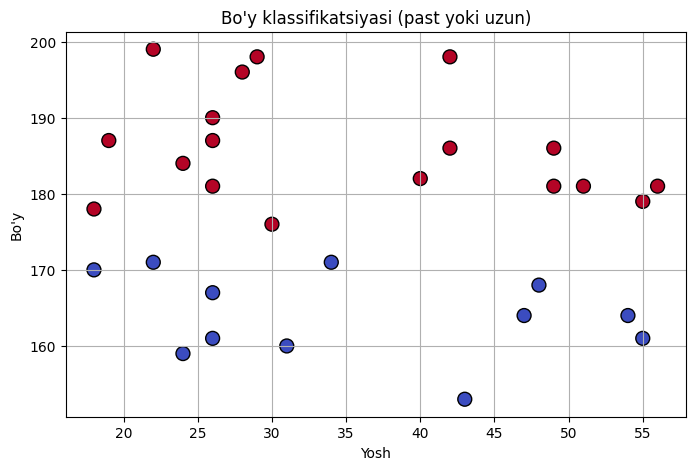

In [18]:
# Vizualizatsiya
plt.figure(figsize=(8, 5))
plt.scatter(df['yosh'], df['boy'], c=df['sinfi'], cmap='coolwarm', s=100, edgecolors='k')
plt.xlabel("Yosh")
plt.ylabel("Bo'y")
plt.title("Bo'y klassifikatsiyasi (past yoki uzun)")
plt.grid(True)
plt.show()